In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import re
from scipy.optimize import curve_fit
colors=['b','r']


In [2]:
def load_file(filenm):
    """
    Load xvg - file and return a pandas dataframe. 
    """
    data = []
    with open(filenm) as f:
        for line in f:
            #If line starts with @ or #, skip
            if line.startswith(('#', '@')):
                continue
            data.append([float(x) for x in re.split(r'\s+', line.strip())])
    return pd.DataFrame(data, columns=['time', 'value'])

In [3]:
def plot_variable_vs_reference(df, ref, name=None, color='blue'):
    """
    Plots reference distribution as normalised histogram, and variable as kde-plot.
    Also shows the value of the variable used in the simulation by a red line.
    """
    sns.histplot(ref.value, stat='density', color=color, label='AA', bins=50, alpha=0.5)
    sns.kdeplot(df.value,label='CG', color=color, alpha=0.5)
    ymin, ymax = plt.ylim()
    plt.ylabel('Probabillity density')
    plt.legend()
    plt.title(name)

########### MM2 ###########
Mean SASA AA: 6.65
Mean SASA CG: 6.43
99 % confidence interval of percentage difference between AA and CG: [-0.07276786  0.01924534]
std AA: 0.055941511941585316, std CG: 0.11917357758387799, err: 0.0331104150343865
########### MM2b-R ###########
Mean SASA AA: 6.60
Mean SASA CG: 6.42
99 % confidence interval of percentage difference between AA and CG: [-0.0547167   0.00410522]
std AA: 0.05856366148312567, std CG: 0.1061972677404294, err: 0.026834582276635377


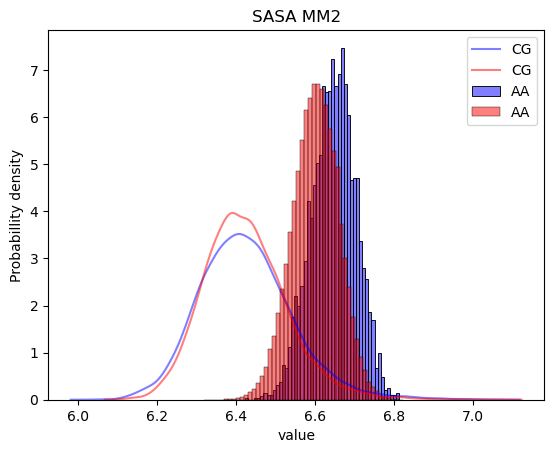

In [6]:
for i,mol in enumerate(["MM2","MM2b-R"]):
    df = load_file(f"CG/{mol}_SASA-CG.xvg")
    varnr = "SASA MM2"
    ref = load_file(f"AA/{mol}_SASA-AA.xvg")

    plot_variable_vs_reference(df, ref, name=varnr, color=colors[i])
    print(f'########### {mol} ###########')
    print(f"Mean SASA AA: {ref.value.mean():.2f}")
    print(f"Mean SASA CG: {df.value.mean():.2f}")
    #Print 99 % confidence interval of percentage difference between AA and CG
    print(f"99 % confidence interval of percentage difference between AA and CG: {np.percentile(((df.value-ref.value)/ref.value).fillna(0), [0.5, 99.5])}")
    print(f"std AA: {ref.value.std()}, std CG: {df.value.std()}, err: {1-df.value.mean()/ref.value.mean()}")
plt.show()

########### STATOR ###########
Mean SASA AA: 4.41
Mean SASA CG: 4.26
99 % confidence interval of percentage difference between AA and CG: [-0.04346852  0.        ]


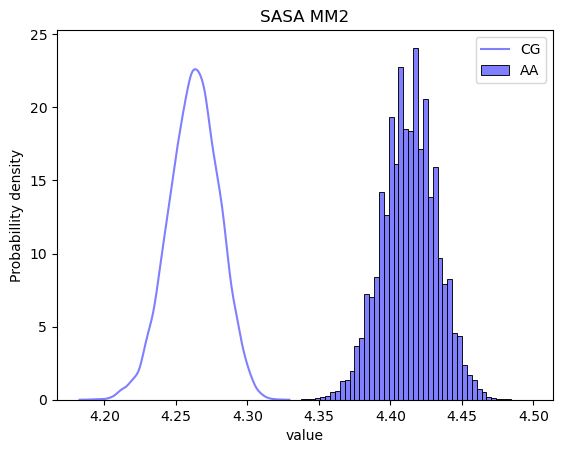

########### UPPER ###########
Mean SASA AA: 4.71
Mean SASA CG: 4.62
99 % confidence interval of percentage difference between AA and CG: [-0.04548353  0.00233397]


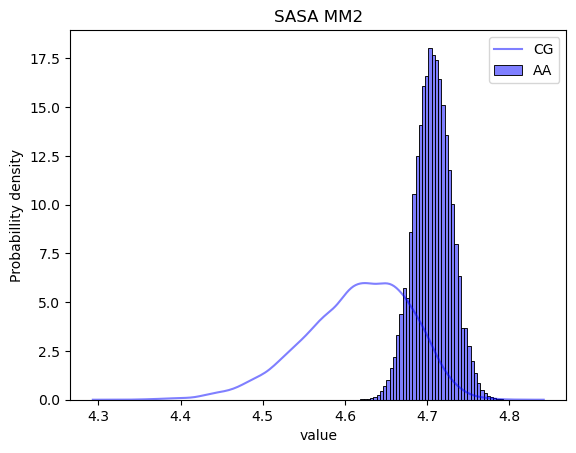

In [12]:
for i,part in enumerate(["STATOR","UPPER"]):
    df = load_file(f"CG/CG-{part}.xvg")
    varnr = "SASA MM2"
    ref = load_file(f"AA/AA-{part}.xvg")
    plot_variable_vs_reference(df, ref, name=varnr, color=colors[0])
    print(f'########### {part} ###########')
    print(f"Mean SASA AA: {ref.value.mean():.2f}")
    print(f"Mean SASA CG: {df.value.mean():.2f}")
    print(f"99 % confidence interval of percentage difference between AA and CG: {np.percentile(((df.value-ref.value)/ref.value).fillna(0), [0.5, 99.5])}")
    plt.show()